# Supermarket Sales Data Analysis

In this notebook, we use data on supermarket sales to analyze people's shopping habits and preferences. 

- 1 - [Data Preparation](#1)

- 2 - [Analysis on Shopping Data](#2)

- 3 - [Conclusion and Ideas to Improve Profits](#3)

We examine people's shopping habits by looking at the following features:
    
1. **Supermarket Branch.** We want to know more about the needs of people going to each branch. 
    
2. **Gender.** This is a natural factor to consider. 
    
3. **Shopping time.**
    Different groups of people may go shopping in different times in a day. For people who have to work in the day time, they may go shopping in the early morning or in the evening. 
       
       
4. **Days in a week.**
    In the weekend, people have more time, they may go shopping more often. 
       
5. **Month or Season.**
    For example, in December, people may shop more to prepare Christmas and New Year. 
       
6. **Payment type.**
    Payment type is also a feature to reflect a person's shopping habit. We may propose different products more accurately to different groups of people. 
       
7. **Types of products.**
    This feature can be considered with other features, e.g. shopping time, days in a week, month. So that we may prepare corresponding products in demand beforehand. 
    
8. **Membership.** 
    We may use this information to improve customers' shopping experiences. 

<a id="1"></a>
## 1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("salesdata.csv")

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


We check how many branches there are and how many product types.

In [4]:
print('The number of branches is:', data['Branch'].nunique())
print('The number of product types is:', data['Product line'].nunique())

The number of branches is: 3
The number of product types is: 6


We transform the data and time to do corresponding calculation.

In [5]:
data["Date"]=pd.to_datetime(data["Date"])
data["Time"]=pd.to_datetime(data["Time"])
data['Time']

0     2023-08-21 13:08:00
1     2023-08-21 10:29:00
2     2023-08-21 13:23:00
3     2023-08-21 20:33:00
4     2023-08-21 10:37:00
              ...        
995   2023-08-21 13:46:00
996   2023-08-21 17:16:00
997   2023-08-21 13:22:00
998   2023-08-21 15:33:00
999   2023-08-21 13:28:00
Name: Time, Length: 1000, dtype: datetime64[ns]

In [6]:
data["year"]=data['Date'].dt.year
data["Days"]=data["Date"].dt.day_name()
data["month"]=data["Date"].dt.month_name()
data["weekday"]=data["Date"].dt.weekday
data["hour"]=data.Time.dt.hour
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,year,Days,month,weekday,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019,Saturday,January,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019,Friday,March,4,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019,Sunday,March,6,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019,Sunday,January,6,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019,Friday,February,4,10


<a id='2'></a>
## 2. Analysis on Shopping Data

### First we look at the total profits for each product type. 

In [7]:
incomesum = data[['Product line', 'gross income']].groupby('Product line').sum()
incomesum = incomesum.sort_values(by=['gross income'], ascending=False)
incomesum['total gross income'] = incomesum['gross income']
incomesum = incomesum.drop(columns=['gross income'])
incomesum

,total gross income
Product line,
Food and beverages,2673.5640
Sports and travel,2624.8965
Electronic accessories,2587.5015
Fashion accessories,2585.9950
Home and lifestyle,2564.8530
Health and beauty,2342.5590


<Axes: xlabel='Product line'>

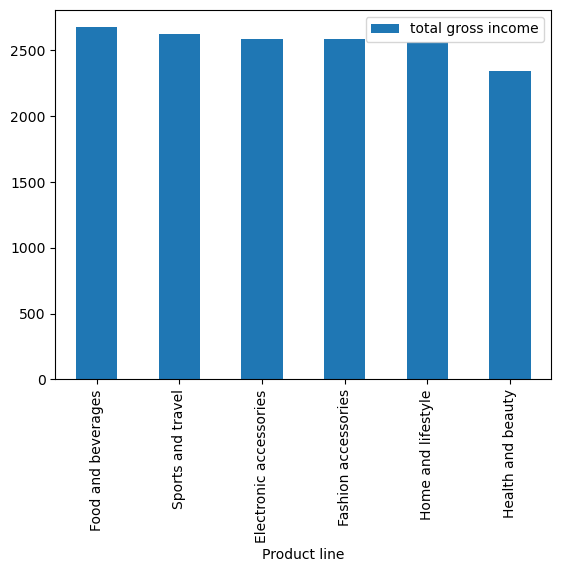

In [8]:
incomesum.plot.bar()

We see that the catetory "Food and beverages" has the largest profit. 
Then we see more carefully on each branch. 

In [9]:
dataA = data[data['Branch']=='A']
dataB = data[data['Branch']=='B']
dataC = data[data['Branch']=='C']
print('The head data for branch A is:', dataA.head())
print('The head data for branch B is:', dataB.head())
print('The head data for branch C is:', dataC.head())

The head data for branch A is:     Invoice ID Branch    City Customer type  Gender            Product line  \
0  750-67-8428      A  Yangon        Member  Female       Health and beauty   
2  631-41-3108      A  Yangon        Normal    Male      Home and lifestyle   
3  123-19-1176      A  Yangon        Member    Male       Health and beauty   
4  373-73-7910      A  Yangon        Normal    Male       Sports and travel   
6  355-53-5943      A  Yangon        Member  Female  Electronic accessories   

   Unit price  Quantity   Tax 5%     Total  ...      Payment    cogs  \
0       74.69         7  26.1415  548.9715  ...      Ewallet  522.83   
2       46.33         7  16.2155  340.5255  ...  Credit card  324.31   
3       58.22         8  23.2880  489.0480  ...      Ewallet  465.76   
4       86.31         7  30.2085  634.3785  ...      Ewallet  604.17   
6       68.84         6  20.6520  433.6920  ...      Ewallet  413.04   

  gross margin percentage  gross income  Rating  year      Da

### We look at the profits for each branch grouped by product types.
#### We can see that the most profitable product types are different for each branch. 

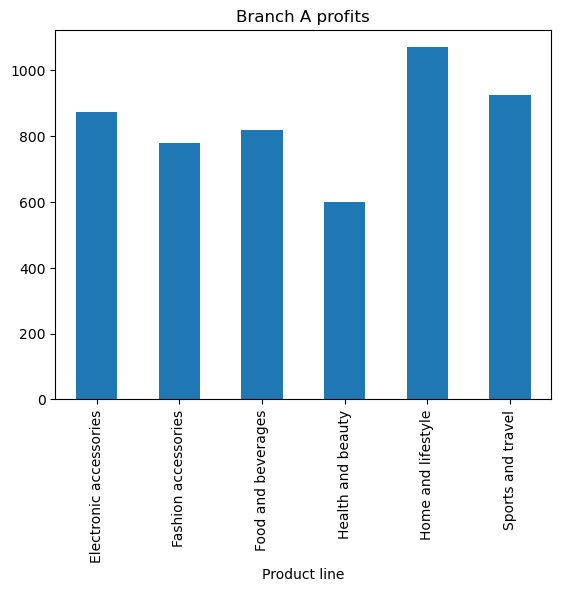

In [10]:
profitA = dataA.groupby(['Product line'])['gross income'].sum()
plt.title('Branch A profits')
profitA.plot.bar()
plt.show()

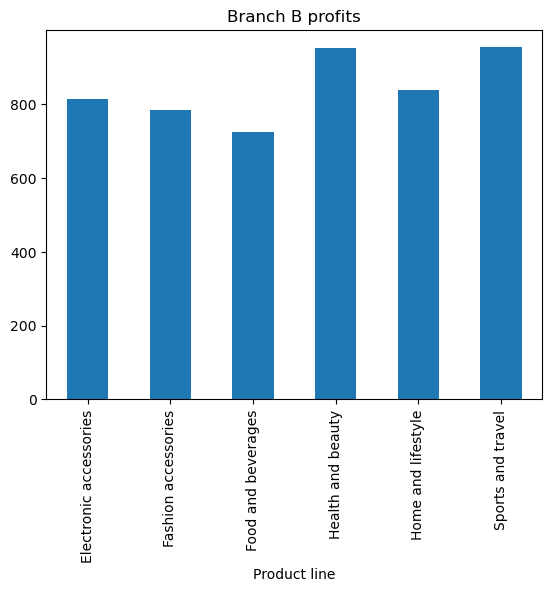

In [11]:
profitB = dataB.groupby(['Product line'])['gross income'].sum()
plt.title('Branch B profits')
profitB.plot.bar()
plt.show()

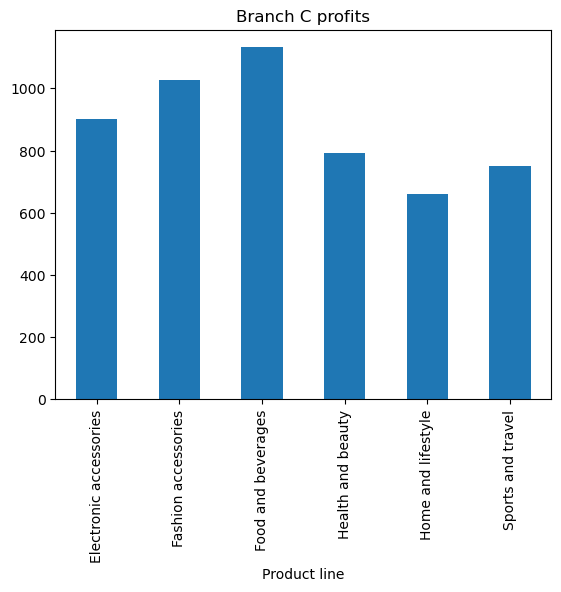

In [12]:
profitC = dataC.groupby(['Product line'])['gross income'].sum()
plt.title('Branch C profits')
profitC.plot.bar()
plt.show()

### Then we look at the gross profit for products grouped by gender. 

In [13]:
incomebysex = data.groupby(['Product line','Gender'])['gross income'].sum()
incomebysex

Product line            Gender
Electronic accessories  Female    1290.5725
                        Male      1296.9290
Fashion accessories     Female    1449.4000
                        Male      1136.5950
Food and beverages      Female    1579.5675
                        Male      1093.9965
Health and beauty       Female     883.8565
                        Male      1458.7025
Home and lifestyle      Female    1430.3275
                        Male      1134.5255
Sports and travel       Female    1360.7010
                        Male      1264.1955
Name: gross income, dtype: float64

<Axes: xlabel='Product line'>

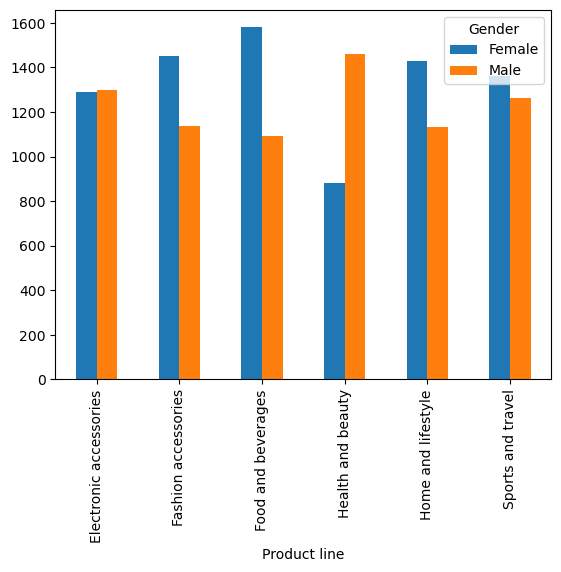

In [14]:
incomebysex.unstack().plot.bar()

### We check the profits of each branch segemented by gender. 

In [15]:
incomebybranch = data.groupby(['Branch', 'Product line', 'Gender'])['gross income'].sum()

<Axes: xlabel='Branch,Product line'>

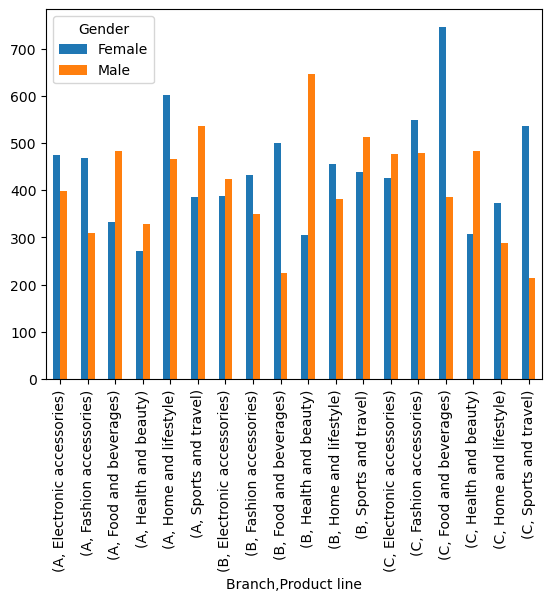

In [16]:
incomebybranch.unstack().plot.bar()

### Next, we want to look at the shopping data by shopping time. 

In [17]:
data.sort_values(by=['Time'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,year,Days,month,weekday,hour
913,522-57-8364,A,Yangon,Member,Male,Fashion accessories,51.34,8,20.5360,431.2560,...,Ewallet,410.72,4.761905,20.5360,7.6,2019,Thursday,January,3,10
180,130-98-8941,C,Naypyitaw,Normal,Male,Fashion accessories,64.26,7,22.4910,472.3110,...,Cash,449.82,4.761905,22.4910,5.7,2019,Saturday,February,5,10
293,316-68-6352,A,Yangon,Member,Female,Food and beverages,36.36,2,3.6360,76.3560,...,Cash,72.72,4.761905,3.6360,7.1,2019,Monday,January,0,10
200,606-80-4905,C,Naypyitaw,Member,Female,Sports and travel,19.15,6,5.7450,120.6450,...,Credit card,114.90,4.761905,5.7450,6.8,2019,Tuesday,January,1,10
669,679-22-6530,B,Mandalay,Normal,Female,Sports and travel,40.62,2,4.0620,85.3020,...,Credit card,81.24,4.761905,4.0620,4.1,2019,Thursday,January,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,628-34-3388,C,Naypyitaw,Normal,Male,Fashion accessories,27.38,6,8.2140,172.4940,...,Credit card,164.28,4.761905,8.2140,7.9,2019,Saturday,January,5,20
267,571-94-0759,B,Mandalay,Member,Female,Food and beverages,74.60,10,37.3000,783.3000,...,Cash,746.00,4.761905,37.3000,9.5,2019,Tuesday,January,1,20
893,715-20-1673,B,Mandalay,Normal,Male,Electronic accessories,28.38,5,7.0950,148.9950,...,Cash,141.90,4.761905,7.0950,9.4,2019,Wednesday,March,2,20
136,700-81-1757,A,Yangon,Normal,Female,Electronic accessories,26.31,5,6.5775,138.1275,...,Credit card,131.55,4.761905,6.5775,8.8,2019,Friday,January,4,20


### We want to look at the sales for different hours in a day. 

In [18]:
timetotal = data.groupby(['hour'])['Total'].sum()

In [19]:
timetotal.head()

hour
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
Name: Total, dtype: float64

<Axes: xlabel='hour'>

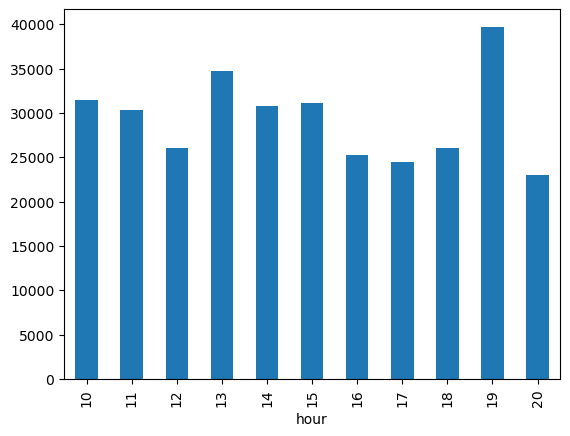

In [20]:
import matplotlib.pyplot as plt
timetotal.plot(kind='bar', x='hour', y='Total')

### Check the sales trend by day. 

<Axes: xlabel='Date'>

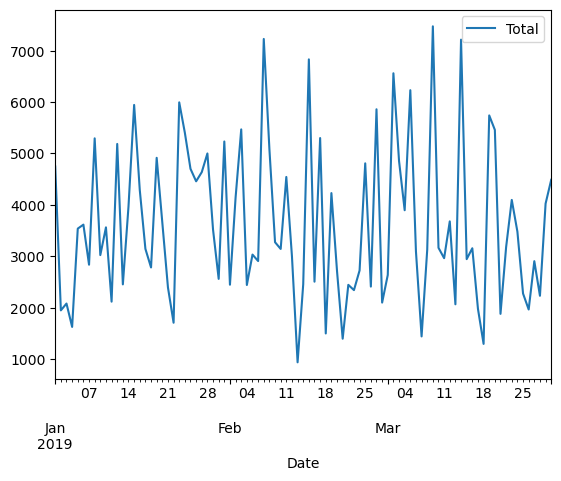

In [21]:
datetotal = data[['Date', 'Total']].groupby(['Date']).sum()
datetotal.plot()

#### Sales trend for branch A. 

In [22]:
datetotalA = dataA[['Date', 'Total']].groupby(['Date']).sum()

<Axes: xlabel='Date'>

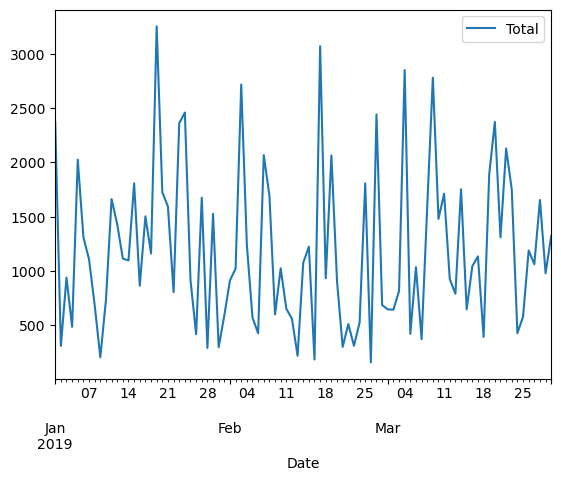

In [23]:
datetotalA.plot()

### Find which days have the largest and lowest profits.

In [24]:
print(datetotal[datetotal.Total==datetotal.Total.max()])
print(datetotal[datetotal.Total==datetotal.Total.min()])

               Total
Date                
2019-03-09  7474.047
               Total
Date                
2019-02-13  934.2375


#### For branch A. 

In [25]:
print(datetotalA[datetotalA.Total==datetotalA.Total.max()])
print(datetotalA[datetotalA.Total==datetotalA.Total.min()])

                Total
Date                 
2019-01-19  3254.4855
               Total
Date                
2019-02-26  156.1035


### We examine the difference beween different payment types.
We can see that the distributions of payment types for each branch are different. In total, cash payment is the most popular payment type. However, each branch has their own favorate payment type. 

In [26]:
paytypetotal = data[['Payment', 'Total']].groupby(['Payment']).sum()

In [27]:
paytypetotal

,Total
Payment,
Cash,112206.570
Credit card,100767.072
Ewallet,109993.107


<Axes: title={'center': 'Payment type for all branches'}, xlabel='Payment', ylabel='Total'>

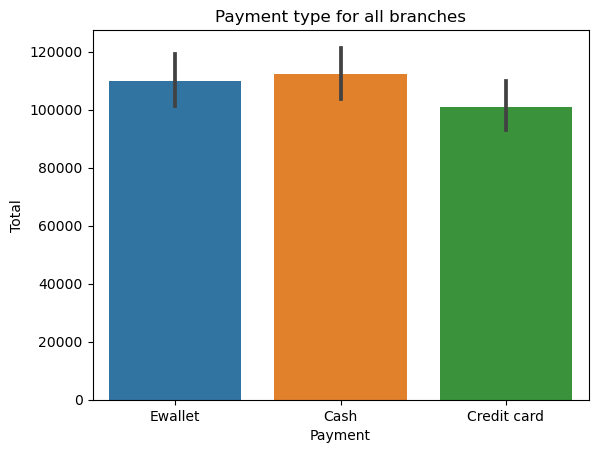

In [28]:
plt.title('Payment type for all branches')
sns.barplot(data=data, x=data['Payment'], y=data['Total'], estimator=sum)

#### Check the payment types for Branch A. 

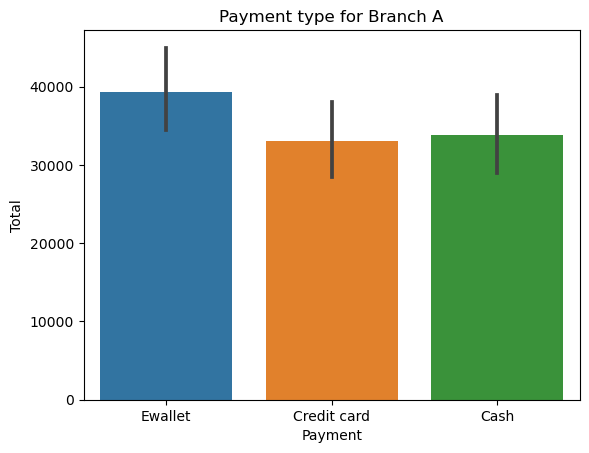

In [29]:
plt.title('Payment type for Branch A')
sns.barplot(data=dataA, x=dataA['Payment'], y=dataA['Total'], estimator=sum)
plt.show()

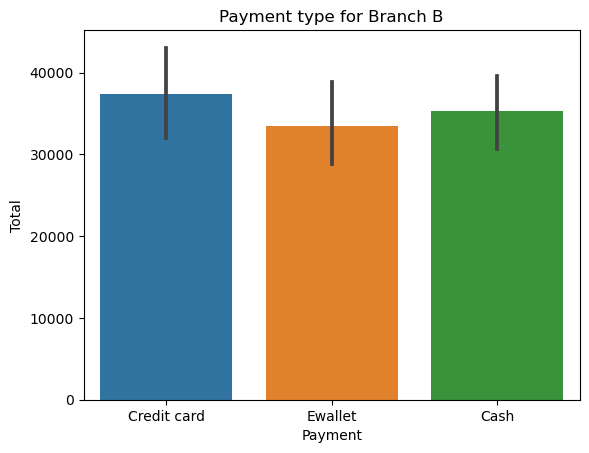

In [30]:
plt.title('Payment type for Branch B')
sns.barplot(data=dataB, x=dataB['Payment'], y=dataB['Total'], estimator=sum)
plt.show()

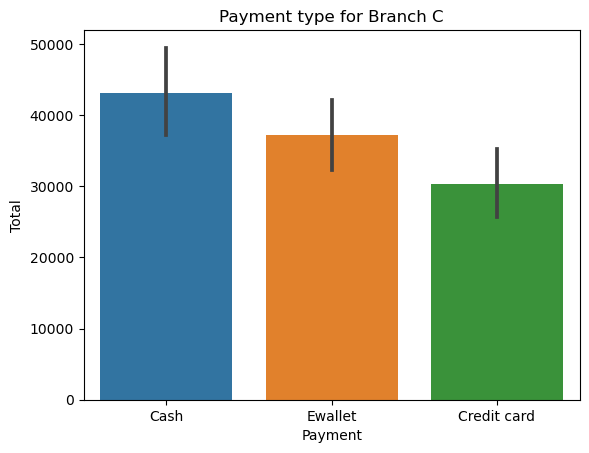

In [31]:
plt.title('Payment type for Branch C')
sns.barplot(data=dataC, x=dataC['Payment'], y=dataC['Total'], estimator=sum)
plt.show()

### Then we examine the rating for these product types. 
We see that customers give different highest ratings for each branch. 

In [32]:
productrate = data.groupby(['Branch', 'Product line'])['Rating'].mean()

In [33]:
productrate

Branch  Product line          
A       Electronic accessories    6.911667
        Fashion accessories       6.878431
        Food and beverages        7.253448
        Health and beauty         6.900000
        Home and lifestyle        6.930769
        Sports and travel         7.257627
B       Electronic accessories    7.116364
        Fashion accessories       6.722581
        Food and beverages        6.994000
        Health and beauty         7.100000
        Home and lifestyle        6.516000
        Sports and travel         6.509677
C       Electronic accessories    6.747273
        Fashion accessories       7.440000
        Food and beverages        7.080303
        Health and beauty         6.998077
        Home and lifestyle        7.060000
        Sports and travel         7.028889
Name: Rating, dtype: float64

<Axes: xlabel='Branch'>

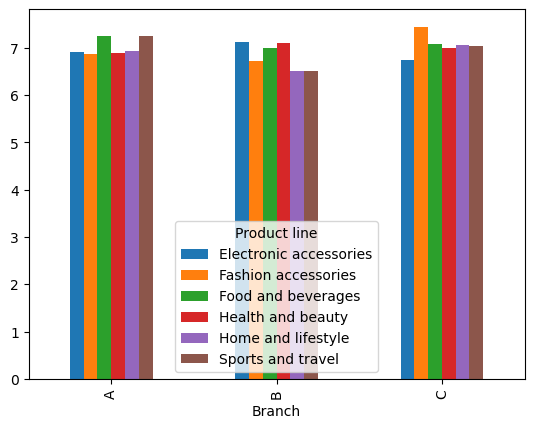

In [34]:
productrate.unstack().plot.bar()

### Now we examine more carefully on the shopping habits of customers, i.e. the sales for each day in a week.

<Axes: xlabel='weekday', ylabel='Total'>

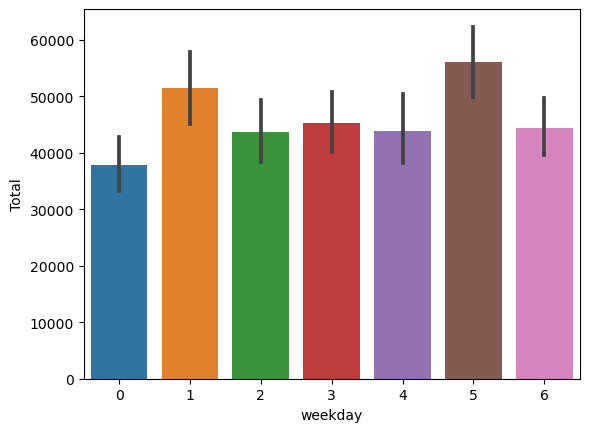

In [35]:
sns.barplot(data=data, x=data['weekday'], y=data['Total'], estimator=sum)

#### We take a look at the weekday data for each branch. We see that the most profitable day for each branch is different from each other. For one branch, Monday is the least profitable day. For the other, Sunday is the least profitable day. It's better to do further analysis on these differences in order to increase profits. 

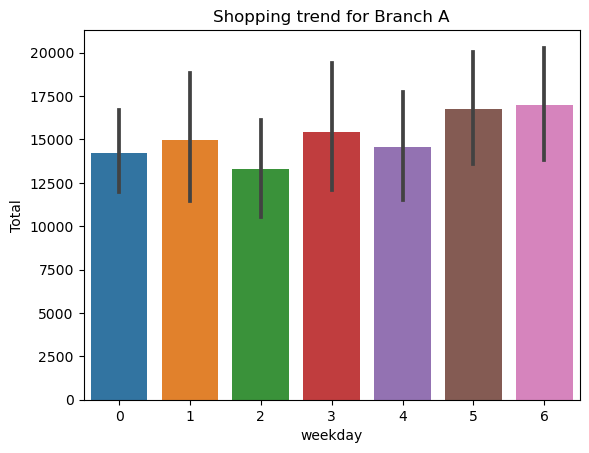

In [36]:
plt.title('Shopping trend for Branch A')
sns.barplot(data=dataA, x=dataA['weekday'], y=dataA['Total'], estimator=sum)
plt.show()

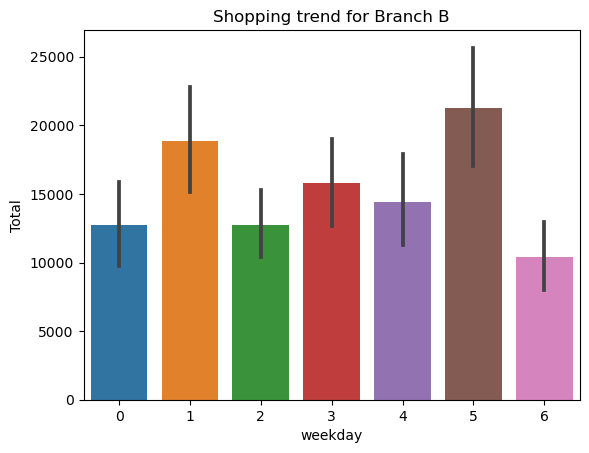

In [37]:
plt.title('Shopping trend for Branch B')
sns.barplot(data=dataB, x=dataB['weekday'], y=dataB['Total'], estimator=sum)
plt.show()

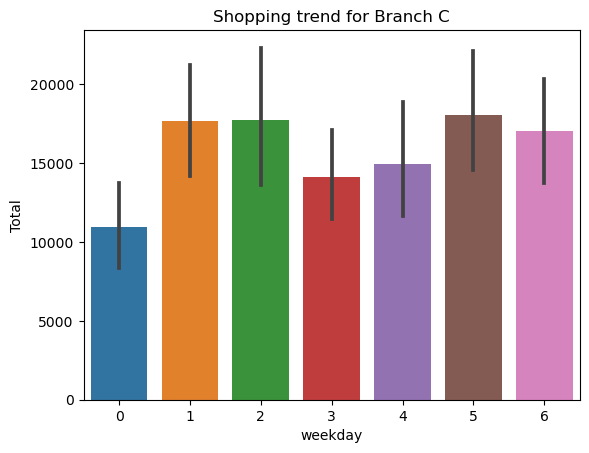

In [38]:
plt.title('Shopping trend for Branch C')
sns.barplot(data=dataC, x=dataC['weekday'], y=dataC['Total'], estimator=sum)
plt.show()

### Moreover, we examine the differences by gender. 
It seems like there are more days for Branch C with more Female shopping sales. Probably the supermarket can propose more products for female customers in Branch C. 

<Axes: title={'center': 'Sales by gender: Branch A'}, xlabel='weekday', ylabel='Total'>

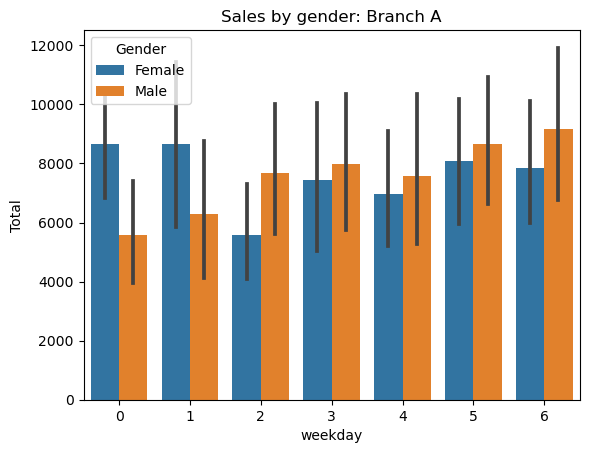

In [39]:
plt.title('Sales by gender: Branch A')
databranch = data[data['Branch']=='A']
sns.barplot(data=databranch, x=databranch['weekday'], y=databranch['Total'], hue='Gender', estimator=sum)

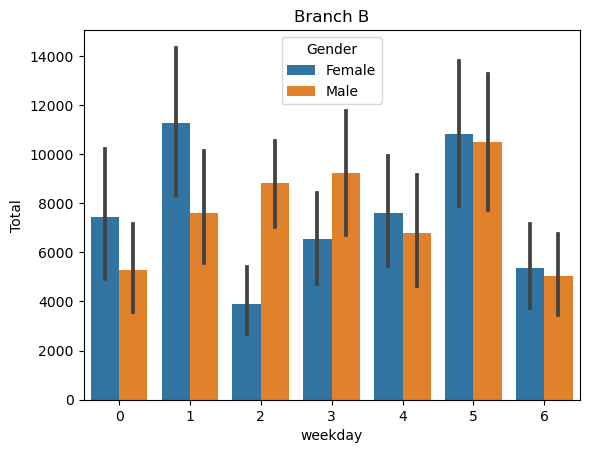

In [40]:
plt.title('Branch B')
databranch = data[data['Branch']=='B']
sns.barplot(data=databranch, x=databranch['weekday'], y=databranch['Total'], hue='Gender', estimator=sum)
plt.show()

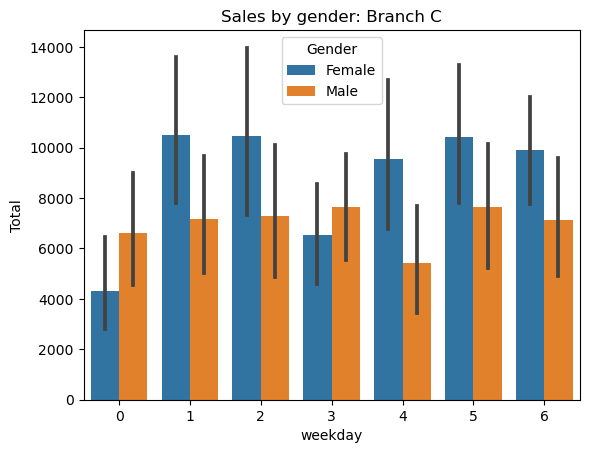

In [41]:
plt.title('Sales by gender: Branch C')
databranch = data[data['Branch']=='C']
sns.barplot(data=databranch, x=databranch['weekday'], y=databranch['Total'], hue='Gender', estimator=sum)
plt.show()

### Now We look at sales by month. 

<Axes: xlabel='month'>

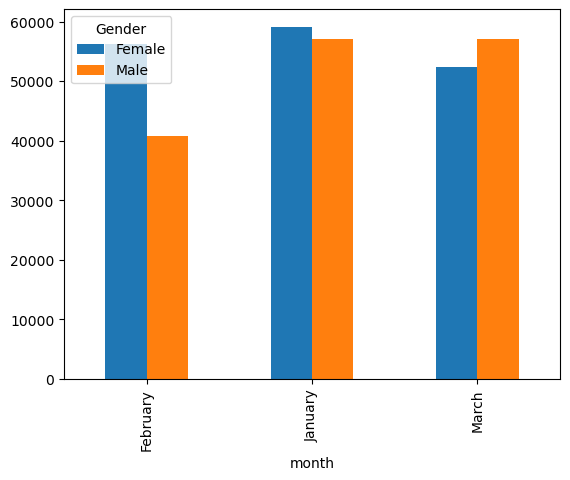

In [42]:
monthtotalbysex = data.groupby(['month', 'Gender'])['Total'].sum()
monthtotalbysex.unstack().plot.bar()

### We also want to examine the characteristics of customers in different shopping hours. 
It seems like for customers in the morning, they prefer to use cash. In the afternoon, customers using credit card and Ewallet increased. 

<Axes: xlabel='hour'>

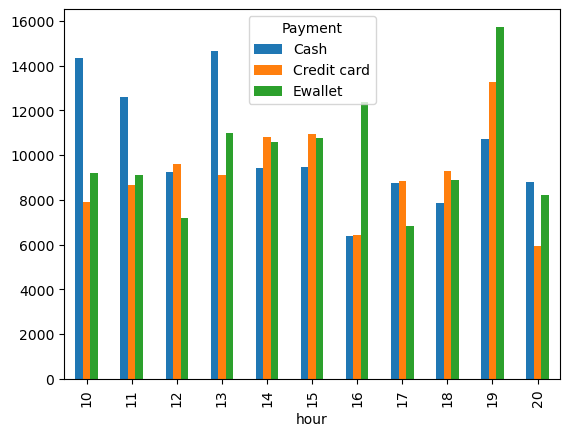

In [43]:
hourtotalbypay = data.groupby(['hour', 'Payment'])['Total'].sum()
hourtotalbypay.unstack().plot.bar()

#### We look at each branch. 

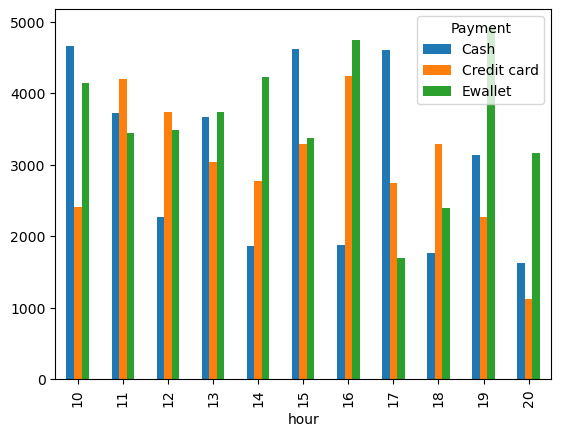

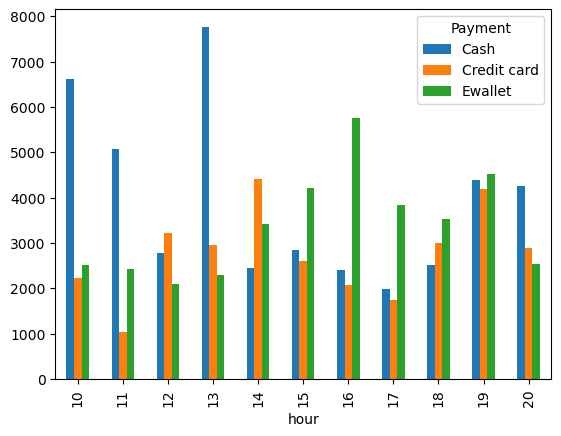

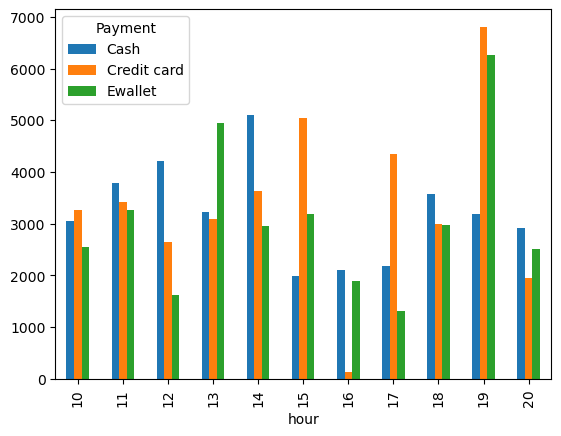

In [44]:
for branch in data['Branch'].unique():
    hourtotalbypay = data[data['Branch']==branch].groupby(['hour', 'Payment'])['Total'].sum()
    hourtotalbypay.unstack().plot.bar()

### Now we look at the gender distribution for different hours. 

<Axes: xlabel='hour', ylabel='Total'>

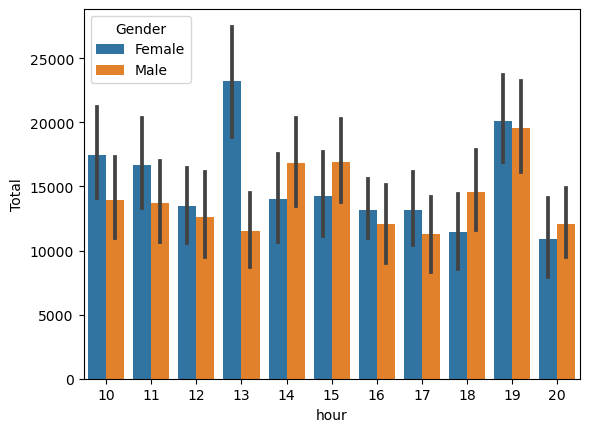

In [45]:
sns.barplot(data=data, x='hour', y='Total', hue=data['Gender'], estimator=sum)

#### Gender distribution by branch. 

<Axes: xlabel='hour', ylabel='Total'>

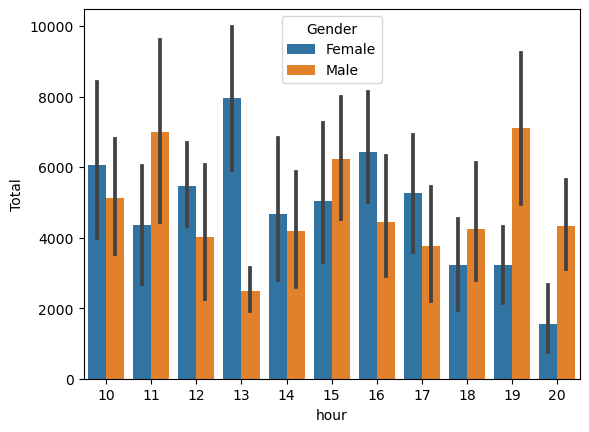

In [46]:
sns.barplot(data=data[data['Branch']=='A'], x='hour', y='Total', hue=data['Gender'], estimator=sum)

<Axes: xlabel='hour', ylabel='Total'>

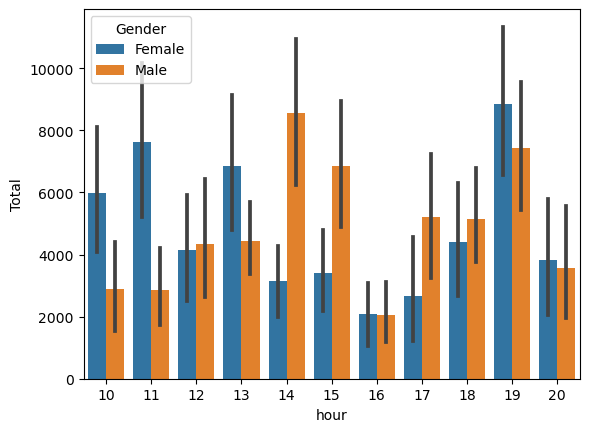

In [47]:
sns.barplot(data=data[data['Branch']=='B'], x='hour', y='Total', hue=data['Gender'], estimator=sum)

<Axes: xlabel='hour', ylabel='Total'>

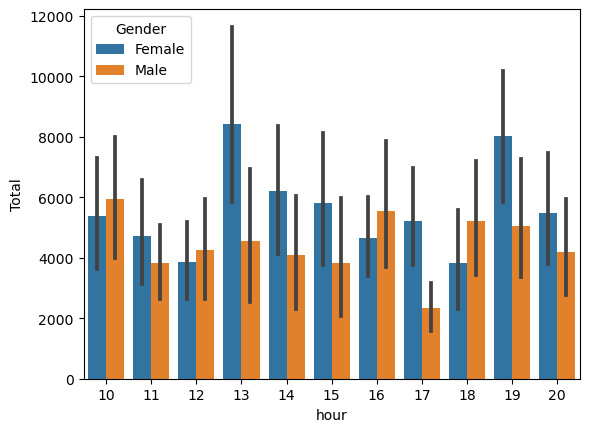

In [48]:
sns.barplot(data=data[data['Branch']=='C'], x='hour', y='Total', hue=data['Gender'], estimator=sum)

### Further, we look at the ratings by gender. 

<Axes: xlabel='Product line'>

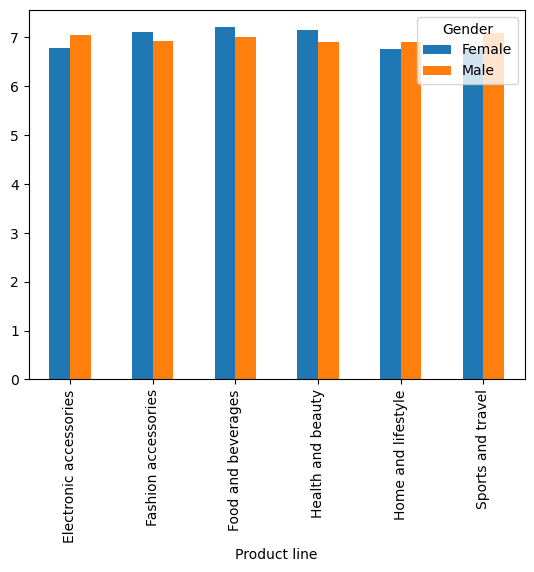

In [49]:
ratebysex = data.groupby(['Product line',  'Gender'])['Rating'].mean()
ratebysex.unstack().plot.bar()

#### We examine the distribution for each branch. 

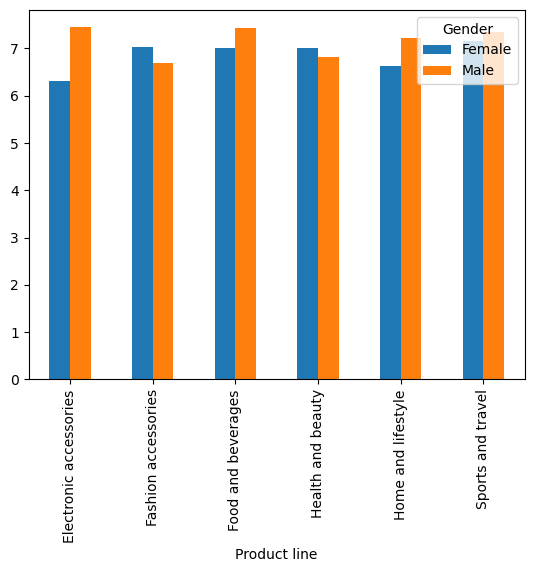

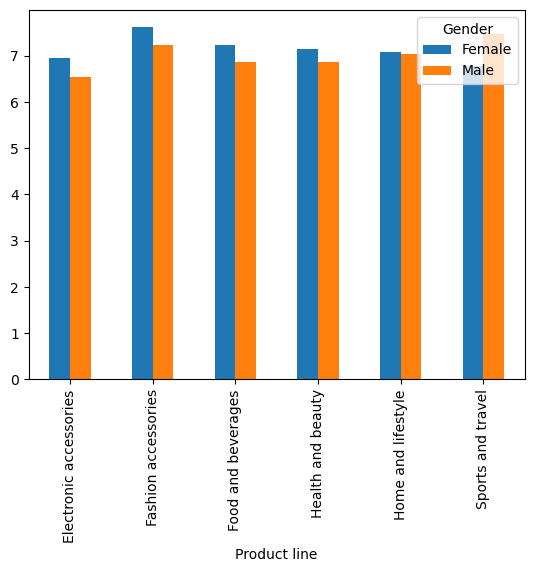

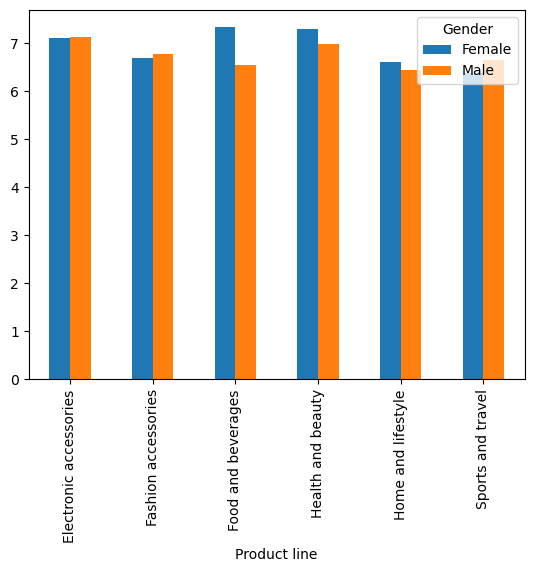

In [50]:
for branch in data['Branch'].unique():
    ratebysex = data[data['Branch']==branch].groupby(['Product line',  'Gender'])['Rating'].mean()
    ratebysex.unstack().plot.bar()

### Membership is a also factor to consider, so that we may plan product promotion or discount events. 

#### For all branches, we can see that members shop more than nonmembers. 

<Axes: xlabel='Branch'>

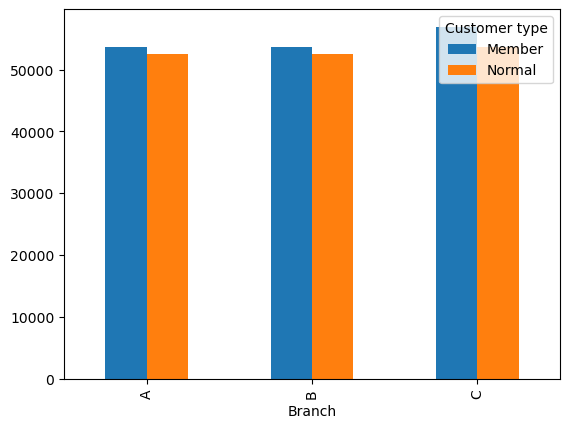

In [54]:
salesbymember = data.groupby(['Branch', 'Customer type'])['Total'].sum()
salesbymember.unstack().plot.bar()

#### Let's also take a look at the average ratings. 
From the average rating, we see something surprise: nonmembers give higher ratings than members. The supermarket may need take further actions to improve the shopping experience of members. 

<Axes: xlabel='Branch'>

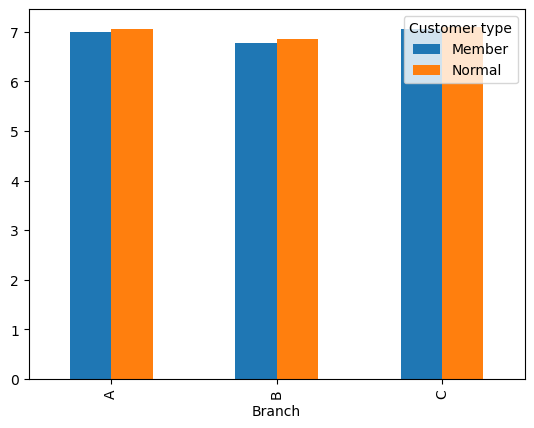

In [56]:
ratebymember = data.groupby(['Branch', 'Customer type'])['Rating'].mean()
ratebymember.unstack().plot.bar()

<a id='3'></a>
## 3. Conclusion and Ideas to Improve Profits

In Section 2, we examined different features of the customers. 

We summarize our analysis. 

1. **Different branches have different favorate product types for customers.**
    The reason may depend on the location of the branches. Customers living near each branch may have different shopping needs. So the supermarket may use further information to examine the group of people nearby, and propose products more precisely for customers' needs. 
    Moreover, supermakets may make different demand plans based on these factors. 
    
2. **Different group of customers have different shopping hours and day.** Combing gender information, payment type, and shopping hours, supermaket could plan ahead for product storage. For example, in the morning people prefer to use cash, then they should prepare more cash exchanges for the cashier. For the favorate shopping hour or day of a specific customer group, the supermaket could arrange their favorate product types more convenient for them to reach, and also plan the products demand ahead. 

3. **Make a reasonable promotion plan.** For example, look at the product types which are less favorate in a branch, examine why, then make a plan to attract more customers to buy them. Or rearrange the storeage to match the customers' shopping habits. 

4. **Membership strategy.** In the above analysis, we see some inconsistency that members shop more but give lower ratings. In order to improve the shopping experiences of all the customers, the supermaket is better to change the current promotion plan to keep the members to stay longer. 
